In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import copy


In [3]:
BSP = pd.read_csv('Brent Spot Price.csv')
BSP.rename(
    columns={"Unnamed: 0":"date",
                "Brent crude oil spot price, Monthly (dollars per barrel)":"price"}
          ,inplace=True)
BSP['date'] = pd.to_datetime(BSP['date'])
BSP.set_index('date', inplace = True)
print(BSP.head())
BSP.info()

             price
date              
1990-01-01  21.251
1990-02-01  19.813
1990-03-01  18.387
1990-04-01  16.612
1990-05-01  16.352
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 1990-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   396 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [4]:
CP = pd.read_csv('Coal Power.csv')
CP.rename(
    columns={"Unnamed: 0":"date",
                "Total consumption : Texas : electric power (total) : quarterly (short tons)":"power"}
          ,inplace=True)
CP["date"] = CP["date"].str.replace("Q1","01") 
CP["date"] = CP["date"].str.replace("Q2","04") 
CP["date"] = CP["date"].str.replace("Q3","07") 
CP["date"] = CP["date"].str.replace("Q4","10") 
print(CP.head(10))
CP['date'] = pd.to_datetime(CP['date'], utc=False)
CP.set_index('date', inplace = True)
print(CP.head())
CP.info()

       date     power
0  2001 01   22164839
1  2001 04   22952510
2  2001 07   25962808
3  2001 10   21357650
4  2002 01   21917084
5  2002 04   23929655
6  2002 07   26277274
7  2002 10   23548673
8  2003 01   23284033
9  2003 04   24767874
               power
date                
2001-01-01  22164839
2001-04-01  22952510
2001-07-01  25962808
2001-10-01  21357650
2002-01-01  21917084
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2001-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   power   80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


<AxesSubplot:xlabel='date'>

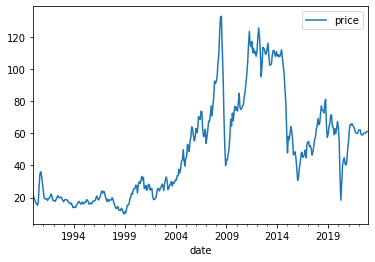

In [4]:
BSP.plot()

<AxesSubplot:xlabel='date'>

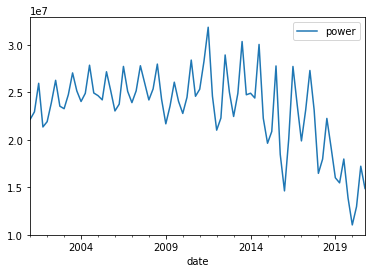

In [5]:
CP.plot()

In [6]:
result_BSP= adfuller(BSP)
print('BSP', '\n',result_BSP)
result_CP= adfuller(CP)
print('CP', '\n',result_CP)

BSP 
 (-2.3662084811231288, 0.1515017802971501, 1, 394, {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}, 2212.551893789197)
CP 
 (1.9763029096941294, 0.9986413567364828, 10, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, 2117.1250184879855)


# differencing  

In [7]:
bsp_copy = copy.deepcopy(BSP)
cp_copy = copy.deepcopy(CP)
price_diff = np.diff(bsp_copy.price, n=1)
power_diff = np.diff(cp_copy.power, n=2)

In [8]:
result_BSP_diff= adfuller(price_diff)
print('BSP with differencing', '\n',result_BSP_diff)
result_CP_diff= adfuller(power_diff)
print('CP with differencing', '\n',result_CP_diff)

BSP with differencing 
 (-13.287381903538751, 7.480882139513171e-25, 0, 394, {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}, 2211.0091292243483)
CP with differencing 
 (-4.758841315888673, 6.515274890253763e-05, 12, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 2060.8370980275263)


In [9]:
BSP_diff = bsp_copy.iloc[1: , :]
BSP_diff['price'] = price_diff
CP_diff = cp_copy.iloc[2:, :]
CP_diff['power'] = power_diff

<ipython-input-9-e132d3fdf1e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BSP_diff['price'] = price_diff
<ipython-input-9-e132d3fdf1e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CP_diff['power'] = power_diff


# Moving averrage

ADF_result_BSP_moving_window 1 : (1.9763029096941294, 0.9986413567364828, 10, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, 2117.1250184879855)
ADF_result_BSP_moving_window 2 : (2.227331265017642, 0.998904250552966, 12, 66, {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}, 1994.361342681079)
ADF_result_BSP_moving_window 3 : (2.183443972535319, 0.9988686041166274, 11, 66, {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}, 1917.4621335192853)
ADF_result_BSP_moving_window 4 : (2.271666386220619, 0.998936474500464, 10, 66, {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}, 1840.759022708618)
ADF_result_BSP_moving_window 5 : (2.791424291112548, 1.0, 10, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 1808.8448525543408)
ADF_result_BSP_moving_window 6 : (2.5035948143313576, 0.9990510005402095, 8, 66, {'1%': -3.5335601

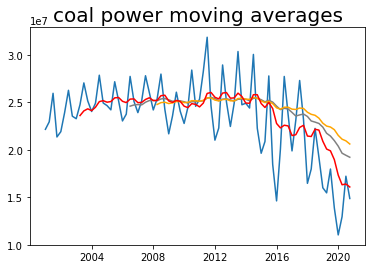

In [6]:
for i in range(1,50):
  CPbest = CP['power'].rolling(window=i).mean()
  CPbest.dropna(inplace = True)
  CPbest_dataframe = pd.DataFrame(CPbest)
  CPbest_values = CPbest_dataframe.iloc[:,0].values
  ADF_result_BSP_moving_windowbest  = adfuller(CPbest_values)
  print('ADF_result_BSP_moving_window',i,":",ADF_result_BSP_moving_windowbest)

CP23 = CP['power'].rolling(window=23).mean()
CP30 = CP['power'].rolling(window=30).mean()
CP10 = CP['power'].rolling(window=10).mean()

CP23.dropna(inplace = True)
CP23_dataframe = pd.DataFrame(CP23)
CP23_values = CP23_dataframe.iloc[:,0].values
ADF_result_BSP_moving_window23 = adfuller(CP23_values)
print('ADF_result_CP_moving_window23',ADF_result_BSP_moving_window23 )

CP30.dropna(inplace = True)
CP30_dataframe = pd.DataFrame(CP30)
CP30_values = CP30_dataframe.iloc[:,0].values
ADF_result_BSP_moving_window30  = adfuller(CP30_values)
print('ADF_result_CP_moving_window30',ADF_result_BSP_moving_window30)

CP10.dropna(inplace = True)
CP10_dataframe = pd.DataFrame(CP10)
CP10_values = CP10_dataframe.iloc[:,0].values
ADF_result_BSP_moving_window10  = adfuller(CP10_values)
print('ADF_result_CP_moving_window10',ADF_result_BSP_moving_window10)


plt.title('coal power moving averages', size=20)
plt.plot(CP['power'], label='Original')
plt.plot(CP23, color='gray', label='50')
plt.plot(CP30, color='orange', label='30')
plt.plot(CP10, color='red', label='10')

ADF_result_BSP_moving_window 1 : (-2.3662084811231288, 0.1515017802971501, 1, 394, {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}, 2212.551893789197)
ADF_result_BSP_moving_window 2 : (-1.5494660624367742, 0.5089148938877112, 12, 382, {'1%': -3.4475850438570115, '5%': -2.869135963767125, '10%': -2.5708164748773332}, 1723.534064979197)
ADF_result_BSP_moving_window 3 : (-1.572841952523959, 0.4972199183494577, 14, 379, {'1%': -3.4477224095888497, '5%': -2.869196333125208, '10%': -2.5708486586002604}, 1425.3964942773969)
ADF_result_BSP_moving_window 4 : (-1.7161509165981663, 0.42281083760147886, 17, 375, {'1%': -3.447909006729481, '5%': -2.8692783343881483, '10%': -2.5708923751111112}, 1226.3314420437232)
ADF_result_BSP_moving_window 5 : (-1.5479926173666978, 0.5096507540319825, 17, 374, {'1%': -3.4479562840494475, '5%': -2.869299109917524, '10%': -2.57090345105665}, 1061.048099015693)
ADF_result_BSP_moving_window 6 : (-1.6466572483429858, 0.45878434668138

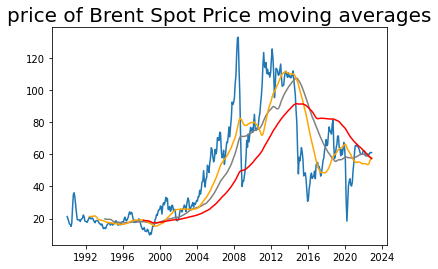

In [5]:
for i in range(1,100):
  BSPbest = BSP['price'].rolling(window=i).mean()
  BSPbest.dropna(inplace = True)
  BSPbest_dataframe = pd.DataFrame(BSPbest)
  BSPbest_values = BSPbest_dataframe.iloc[:,0].values
  ADF_result_BSP_moving_windowbest  = adfuller(BSPbest_values)
  print('ADF_result_BSP_moving_window',i,":",ADF_result_BSP_moving_windowbest)

BSP50 = BSP['price'].rolling(window=50).mean()
BSP30 = BSP['price'].rolling(window=30).mean()
BSP100 = BSP['price'].rolling(window=100).mean()
BSP50.dropna(inplace = True)
BSP50_dataframe = pd.DataFrame(BSP50)
BSP50_dataframe_values = BSP50_dataframe.iloc[:,0].values
ADF_result_BSP_moving_window50 = adfuller(BSP50_dataframe_values)
print('ADF_result_BSP_moving_window50',ADF_result_BSP_moving_window50)

BSP30.dropna(inplace = True)
BSP30_dataframe = pd.DataFrame(BSP30)
BSP30_dataframe_values = BSP30_dataframe.iloc[:,0].values
ADF_result_BSP_moving_window30 = adfuller(BSP30_dataframe_values)
print('ADF_result_BSP_moving_window30',ADF_result_BSP_moving_window30)

BSP100.dropna(inplace = True)
BSP100_dataframe = pd.DataFrame(BSP100)
BSP100_dataframe_values = BSP100_dataframe.iloc[:,0].values
ADF_result_BSP_moving_window100 = adfuller(BSP30_dataframe_values)
print('ADF_result_BSP_moving_window100',ADF_result_BSP_moving_window100)


plt.title('price of Brent Spot Price moving averages', size=20)
plt.plot(BSP['price'], label='Original')
plt.plot(BSP50, color='gray', label='50')
plt.plot(BSP30, color='orange', label='30')
plt.plot(BSP100, color='red', label='100')

# Decomposition 

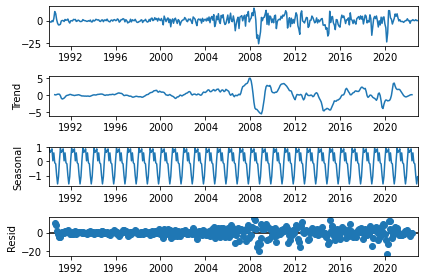

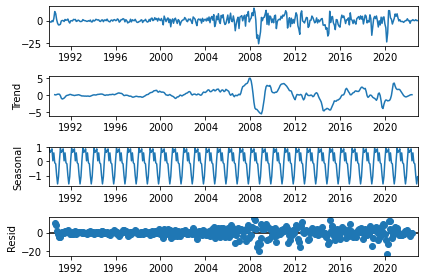

In [12]:
decompose_bsp = seasonal_decompose(BSP_diff, model = 'additive')
decompose_bsp.plot()

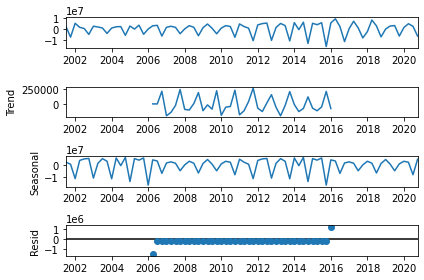

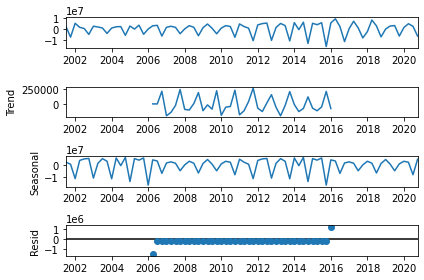

In [13]:
decompose_cp = seasonal_decompose(CP_diff, model = 'additive', period = int(len(CP_diff)/2))
decompose_cp.plot()

# Autocorrelation

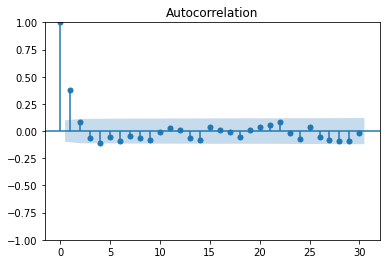

In [14]:
sm.graphics.tsa.plot_acf(BSP_diff ,lags=30)
plt.show()

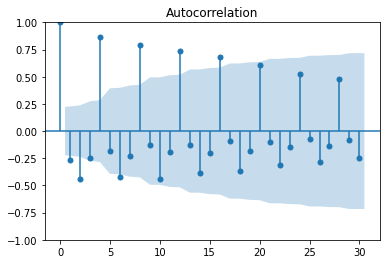

In [15]:
sm.graphics.tsa.plot_acf(CP_diff ,lags=30)
plt.show()

# Partial autocorrelation

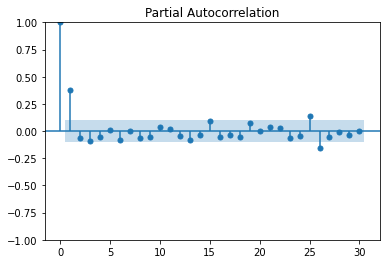

In [16]:
sm.graphics.tsa.plot_pacf(BSP_diff ,lags=30, method="ywm")
plt.show()

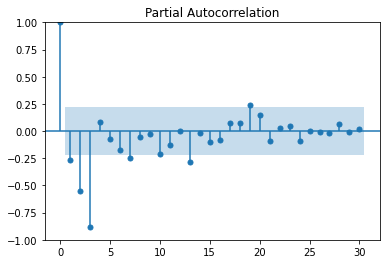

In [17]:
sm.graphics.tsa.plot_pacf(CP_diff ,lags=30, method="ywm")
plt.show()

# Split train and test data

In [18]:
#BSP
train_size = int(len(BSP_diff)*0.8)
bsp_train = BSP_diff.iloc[:train_size, :]
bsp_test = BSP_diff.iloc[train_size:, :]

In [19]:
#cp
train_size_cp = int(len(CP_diff)*0.8)
cp_train = CP_diff.iloc[:train_size_cp, :]
cp_test = CP_diff.iloc[train_size_cp:, :]

In [20]:
print(len(cp_train), len(cp_test))

62 16


# AR 

In [21]:
#BSP
ar_bsp = AutoReg(bsp_train, lags =6).fit()
print (ar_bsp.summary())

                            AutoReg Model Results                             
Dep. Variable:                  price   No. Observations:                  316
Model:                     AutoReg(6)   Log Likelihood                -893.841
Method:               Conditional MLE   S.D. of innovations              4.325
Date:                Fri, 22 Apr 2022   AIC                           1803.683
Time:                        19:00:30   BIC                           1833.575
Sample:                    08-01-1990   HQIC                          1815.633
                         - 05-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0728      0.246      0.296      0.767      -0.409       0.554
price.L1       0.3855      0.056      6.840      0.000       0.275       0.496
price.L2       0.0181      0.060      0.299      0.7

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


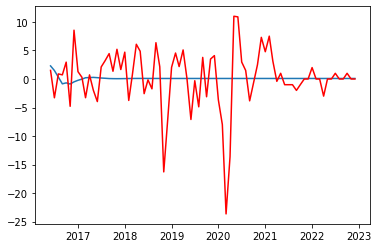

In [22]:
#
# Make the predictions
#
bsp_pred = ar_bsp.predict(start=len(bsp_train), end=(len(BSP_diff)-1), dynamic=False)

plt.plot(bsp_pred)
plt.plot(bsp_test, color='red')

In [23]:
ar_cp = AutoReg(cp_train, lags =3).fit()
print (ar_cp.summary())

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                  power   No. Observations:                   62
Model:                     AutoReg(3)   Log Likelihood                -931.566
Method:               Conditional MLE   S.D. of innovations        1741613.819
Date:                Fri, 22 Apr 2022   AIC                           1873.133
Time:                        19:00:31   BIC                           1883.521
Sample:                    04-01-2002   HQIC                          1877.188
                         - 10-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.888e+04   2.27e+05      0.348      0.728   -3.66e+05    5.24e+05
power.L1      -0.9191      0.052    -17.796      0.000      -1.020      -0.818
power.L2      -0.9727      0.052    -18.852      0.0

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


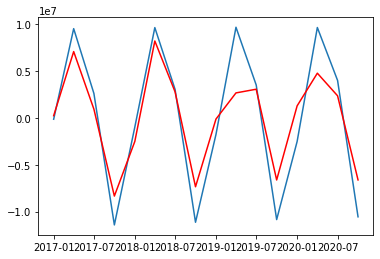

In [24]:
#
# Make the predictions
#
cp_pred = ar_cp.predict(start=len(cp_train), end=(len(CP_diff)-1), dynamic=False)
plt.figure()
plt.plot(cp_pred)
plt.plot(cp_test, color='red')

# MA

In [25]:
ma_bsp = ARIMA(bsp_train, order=(0,0,6)).fit()
print(ma_bsp.summary())


C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  316
Model:                 ARIMA(0, 0, 6)   Log Likelihood                -909.526
Date:                Fri, 22 Apr 2022   AIC                           1835.052
Time:                        19:00:31   BIC                           1865.098
Sample:                    02-01-1990   HQIC                          1847.055
                         - 05-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.340      0.239      0.811      -0.586       0.748
ma.L1          0.3858      0.042      9.177      0.000       0.303       0.468
ma.L2          0.1682      0.035      4.819      0.0

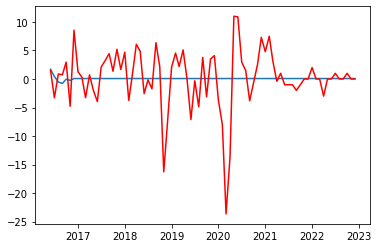

In [26]:
bsp_pred = ma_bsp.predict(start=len(bsp_train), end=(len(BSP_diff)-1), dynamic=False)

plt.plot(bsp_pred)
plt.plot(bsp_test, color='red')

In [27]:
ma_cp = ARIMA(cp_train, order=(0,0,3)).fit()
print(ma_cp.summary())

                               SARIMAX Results                                
Dep. Variable:                  power   No. Observations:                   62
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1038.025
Date:                Fri, 22 Apr 2022   AIC                           2086.050
Time:                        19:00:31   BIC                           2096.686
Sample:                    07-01-2001   HQIC                          2090.226
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.787e+04   2.44e+05     -0.320      0.749   -5.55e+05       4e+05
ma.L1         -0.0400      0.259     -0.154      0.877      -0.548       0.468
ma.L2         -0.2991      0.284     -1.052      0.2

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


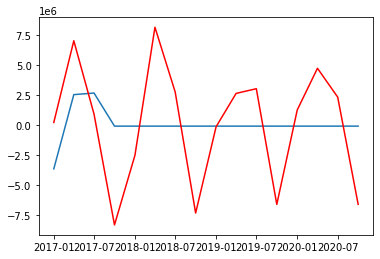

In [28]:
cp_pred = ma_cp.predict(start=len(cp_train), end=(len(CP_diff)-1), dynamic=False)
plt.figure()
plt.plot(cp_pred)
plt.plot(cp_test, color='red')

# ARMA

In [29]:
arma_bsp = ARIMA(bsp_train, order=(2,0,3)).fit()
print(arma_bsp.summary())


C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  316
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -909.231
Date:                Fri, 22 Apr 2022   AIC                           1832.463
Time:                        19:00:32   BIC                           1858.753
Sample:                    02-01-1990   HQIC                          1842.966
                         - 05-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0726      0.373      0.195      0.846      -0.659       0.804
ar.L1          1.6390      0.026     63.202      0.000       1.588       1.690
ar.L2         -0.9793      0.025    -39.699      0.0

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


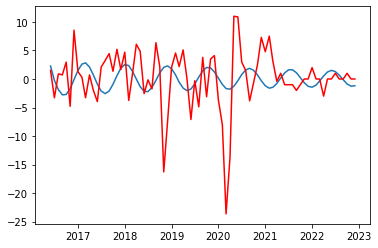

In [30]:
bsp_pred = arma_bsp.predict(start=len(bsp_train), end=(len(BSP_diff)-1), dynamic=False)

plt.plot(bsp_pred)
plt.plot(bsp_test, color='red')

In [31]:
arma_cp = ARIMA(cp_train, order=(2,0,1)).fit()
print(arma_cp.summary())

                               SARIMAX Results                                
Dep. Variable:                  power   No. Observations:                   62
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1045.033
Date:                Fri, 22 Apr 2022   AIC                           2100.066
Time:                        19:00:33   BIC                           2110.702
Sample:                    07-01-2001   HQIC                          2104.242
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.787e+04    2.1e+04     -3.716      0.000   -1.19e+05   -3.68e+04
ar.L1         -0.2131      0.041     -5.206      0.000      -0.293      -0.133
ar.L2         -0.6015      0.056    -10.710      0.0

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


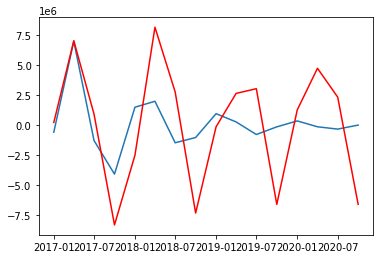

In [32]:
cp_pred = arma_cp.predict(start=len(cp_train), end=(len(CP_diff)-1), dynamic=False)
plt.figure()
plt.plot(cp_pred)
plt.plot(cp_test, color='red')

# ARIMA

In [33]:
#BSP
train_size_arima = int(len(BSP)*0.8)
bsp_train_arima = BSP.iloc[:train_size_arima, :]
bsp_test_arima = BSP.iloc[train_size_arima:, :]

In [34]:
#cp
train_size_cp_arima = int(len(CP)*0.8)
cp_train_arima = CP.iloc[:train_size_cp_arima, :]
cp_test_arima = CP.iloc[train_size_cp_arima:, :]

In [35]:
arima_bsp = ARIMA(bsp_train_arima, order=(2,1,3)).fit()
print(arima_bsp.summary())

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  316
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -906.746
Date:                Fri, 22 Apr 2022   AIC                           1825.493
Time:                        19:00:34   BIC                           1848.008
Sample:                    01-01-1990   HQIC                          1834.488
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6038      0.049     32.828      0.000       1.508       1.700
ar.L2         -0.9264      0.047    -19.871      0.000      -1.018      -0.835
ma.L1         -1.2499      0.072    -17.374      0.0

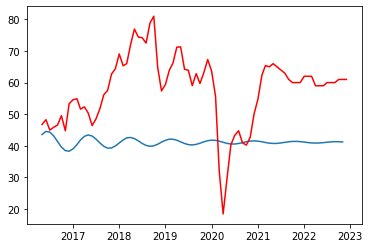

In [36]:
bsp_pred = arima_bsp.predict(start=len(bsp_train_arima), end=(len(BSP_diff)-1), dynamic=False)

plt.plot(bsp_pred)
plt.plot(bsp_test_arima, color='red')

In [37]:
arima_cp = ARIMA(cp_train_arima, order=(2,1,1)).fit()
print(arima_cp.summary())

                               SARIMAX Results                                
Dep. Variable:                  power   No. Observations:                   64
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1051.093
Date:                Fri, 22 Apr 2022   AIC                           2110.185
Time:                        19:00:34   BIC                           2118.758
Sample:                    01-01-2001   HQIC                          2113.557
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1647      0.067      2.441      0.015       0.032       0.297
ar.L2         -0.3475      0.021    -16.509      0.000      -0.389      -0.306
ma.L1         -0.4647      0.089     -5.192      0.0

C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\envs\Pandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


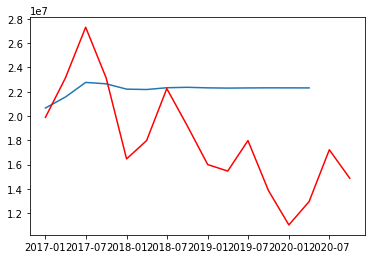

In [38]:
cp_pred = arima_cp.predict(start=len(cp_train_arima), end=(len(CP_diff)-1), dynamic=False)
plt.figure()
plt.plot(cp_pred)
plt.plot(cp_test_arima, color='red')